<a href="https://colab.research.google.com/github/IKAR42/SberDS_Study/blob/main/HW_NN_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


По возможности на одной из ближайших лекций или на QA подсветите, пожалуйста :
1. Правильно понимаю, что при подготовке дата сета нет разбивки на x и y как в классическом ml ? есть только train и test ?
2. Чем отличается разметка данных для НН в отличие от классического ml?


Загружаем библиотеки

In [ ]:
import torch
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.autograd import Variable

from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

In [ ]:
input_size = 784       # Размеры изображения = 28 x 28 = 784
hidden_size = 500      # Количество узлов на скрытом слое
num_classes = 10       # Число классов на выходе. В этом случае от 0 до 9
num_epochs = 10        # Количество тренировок всего набора данных
batch_size = 32       # Размер входных данных для одной итерации
learning_rate = 0.0001  # Скорость обучения

Загружаем Dataset MNIST

In [ ]:
train_dataset = dsets.MNIST(
    root='./data',
    train=True,
    transform=transforms.ToTensor(),
    download=True
)
 
test_dataset = dsets.MNIST(
    root='./data',
    train=False,
    transform=transforms.ToTensor()
)

Загруженный датасет загружаем в код питона

In [ ]:
train_loader = torch.utils.data.DataLoader(
    dataset=train_dataset,
    batch_size=batch_size,
    shuffle=True
)
 
test_loader = torch.utils.data.DataLoader(
    dataset=test_dataset,
    batch_size=batch_size,
    shuffle=False
)

Создаем структуру модели

In [ ]:
class Net(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(Net, self).__init__()                    # Наследуемый родительским классом nn.Module
        self.fc1 = nn.Linear(input_size, hidden_size)  # 1й связанный слой: 784 (данные входа) -> 500 (скрытый узел)
        self.relu = nn.ReLU()                          # Нелинейный слой ReLU max(0,x)
        self.fc2 = nn.Linear(hidden_size, num_classes) # 2й связанный слой: 500 (скрытый узел) -> 10 (класс вывода)
    
    def forward(self, x):                              # Передний пропуск: складывание каждого слоя вместе
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

In [ ]:
net = Net(input_size, hidden_size, num_classes)
net

Net(
  (fc1): Linear(in_features=784, out_features=500, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=500, out_features=10, bias=True)
)

Выбор функции потерь и оптимизатора

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)

Тренируем сеть

In [ ]:
def train_one_epoch(model, loader):
    for i, (images, labels) in enumerate(loader):   # Загрузка партии изображений с индексом, данными, классом
        images = Variable(images.view(-1, 28*28))         # Конвертация тензора в переменную: изменяем изображение с вектора, размером 784 на матрицу 28 x 28
        labels = Variable(labels)
        
        optimizer.zero_grad()                             # Инициализация скрытых масс до нулей
        outputs = model(images)                             # Передний пропуск: определение выходного класса, данного изображения
        loss = criterion(outputs, labels)                 # Определение потерь: разница между выходным классом и предварительно заданной меткой
        loss.backward()                                   # Обратный проход: определение параметра weight
        optimizer.step()

In [ ]:
def evaluate(model, loader):
    correct = 0
    total = 0
    for images, labels in loader:
        images = Variable(images.view(-1, 28*28))
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)  # Выбор лучшего класса из выходных данных: класс с лучшим счетом
        total += labels.size(0)                    # Увеличиваем суммарный счет
        correct += (predicted == labels).sum()     # Увеличиваем корректный счет
    return 100 * correct / total

In [ ]:
train_accuracies = []
test_accuracies = []
for epoch in tqdm(range(num_epochs)):
    test_accuracies.append(evaluate(net, test_loader).item())
    train_accuracies.append(evaluate(net, train_loader).item())
    train_one_epoch(net, train_loader)

  0%|          | 0/10 [00:00<?, ?it/s]

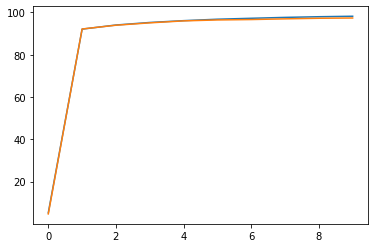

In [ ]:
plt.plot(range(len(train_accuracies)), train_accuracies)
plt.plot(range(len(test_accuracies)), test_accuracies)
plt.show()

Сохраняем модель (веса)

In [ ]:
torch.save(net.state_dict(), 'fnn_model.pkl')

Проверяем качество работы модели на открытых данных из интернета

In [ ]:
!wget https://www.kindpng.com/picc/m/366-3660528_9-handwritten-5-clip-arts-0-9-handwritten.png

--2023-02-21 14:29:09--  https://www.kindpng.com/picc/m/366-3660528_9-handwritten-5-clip-arts-0-9-handwritten.png
Resolving www.kindpng.com (www.kindpng.com)... 192.187.103.12
Connecting to www.kindpng.com (www.kindpng.com)|192.187.103.12|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 46642 (46K) [image/png]
Saving to: ‘366-3660528_9-handwritten-5-clip-arts-0-9-handwritten.png’

366-3660528_9-handw 100%[===================>]  45.55K   205KB/s    in 0.2s    

2023-02-21 14:29:10 (205 KB/s) - ‘366-3660528_9-handwritten-5-clip-arts-0-9-handwritten.png’ saved [46642/46642]



In [ ]:
!ls

366-3660528_9-handwritten-5-clip-arts-0-9-handwritten.png
data
drive
fnn_model.pkl
png-clipart-handwriting-letter-others-miscellaneous-text.png
sample_data


In [ ]:
# from google.colab import files
from PIL import Image

In [ ]:
# from io import BytesIO
# uploaded = files.upload()
# im = Image.open(BytesIO(uploaded['unnamed - 6.png']))

In [ ]:
img = Image.open("366-3660528_9-handwritten-5-clip-arts-0-9-handwritten.png")

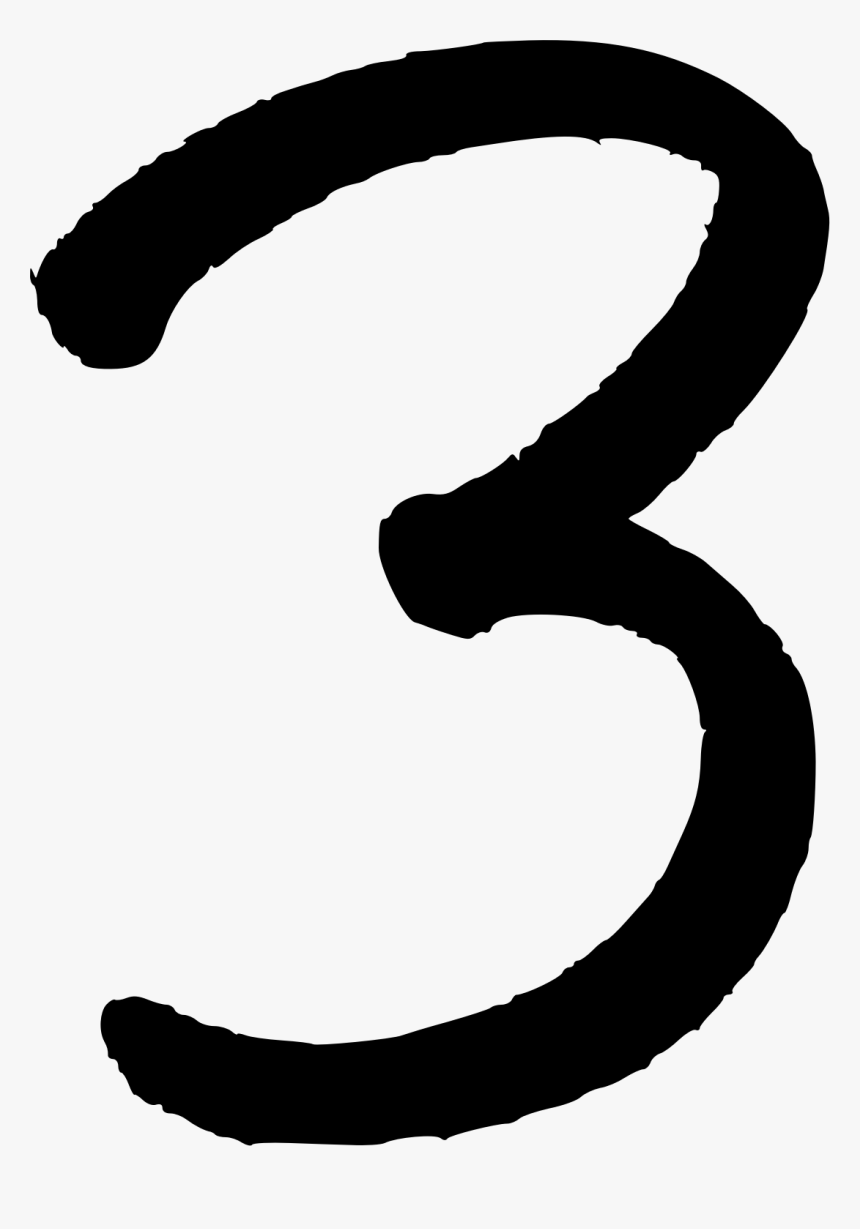

In [ ]:
img

Проверяю размерности данных на которых обучалась модель и то как скормить данные, чтобы получить предикт

In [ ]:
x, y = next(iter(train_loader))

In [ ]:
x.view(-1, 28*28).shape

torch.Size([1, 784])

In [ ]:
net(x.view(-1, 28*28)).argmax(axis=1)

tensor([2, 3, 1, 0, 7, 9, 7, 1, 0, 1, 7, 4, 6, 0, 8, 9, 9, 4, 7, 0, 7, 9, 1, 6,
        0, 0, 2, 7, 3, 8, 7, 9])

In [ ]:
net(x[0].view(-1, 28*28)).argmax(axis=1)

tensor([2])

Свою новую картинку перевожу в чб, делаю ресайз и скармливаю модели

In [ ]:
img_tens = transforms.ToTensor()(img.convert('L').resize((28, 28)))

In [ ]:
net(img_tens.view(-1, 28*28)).argmax(axis=1).item()

tensor([5])

Модель по итогу ошиблась. Это могу связать с тем, что данные на обучении были однородны и взятый пример сильно отличается от трейн выборки